In [1]:
from scipy.io.arff import loadarff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
arff = loadarff('../data/seismic-bumps.arff')

In [3]:
df = pd.DataFrame(arff[0])

In [4]:
# Converting string columns from byte-string to string
stringcols = ['seismic','seismoacoustic', 'shift', 'ghazard', 'class']
for col in stringcols:
    df[col] = df[col].apply(lambda x: x.decode('utf8'))

In [5]:
# encode column 'shift' {W,N} into a {0,1}
def encodeshift(s):
    if s == 'W':
        return 0
    elif s == 'N':
        return 1
    else:
        raise ValueError(f'{s} shouldnt be here')
df['shift'] = df['shift'].apply(encodeshift)

In [6]:
# encode seismic and seismicacoustic
d = {'a':0, 'b':1, 'c':2, 'd':3}
def encodeseismic(s):
    return d[s]
df['seismic'] = df['seismic'].apply(encodeseismic)
df['seismoacoustic'] = df['seismoacoustic'].apply(encodeseismic)
df['ghazard'] = df['ghazard'].apply(encodeseismic)
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,0,0,1,15180.0,48.0,-72.0,-72.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,1,14720.0,33.0,-70.0,-79.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,0,0,1,8050.0,30.0,-81.0,-78.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,1,28820.0,171.0,-23.0,40.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,0,0,1,12640.0,57.0,-63.0,-52.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,1,0,0,81410.0,785.0,432.0,151.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2580,1,0,0,42110.0,555.0,213.0,118.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2581,1,0,0,26960.0,540.0,101.0,112.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2582,0,0,0,16130.0,322.0,2.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


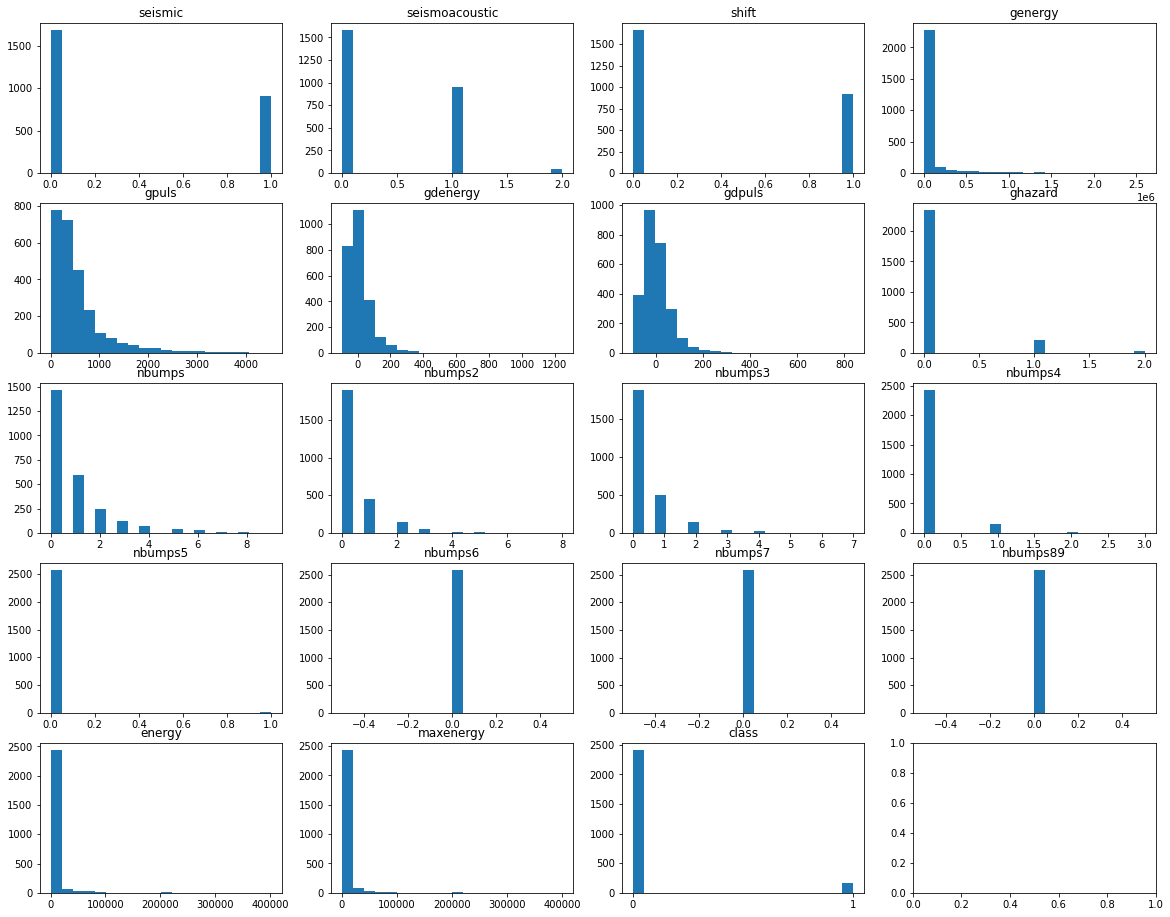

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 16))

i = 0
for row in axes:
    for ax in row:
        ax.hist(df[df.columns[i]], bins = 20)
        ax.title.set_text(df.columns[i])
    
        i += 1
        if i >= len(df.columns): break

plt.show()

In [8]:
df.describe()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
count,2584.000000,2584.000000,2584.000000,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000
mean,0.349071,0.407121,0.356424,9.024252e+04,538.579334,12.375774,4.508901,0.105263,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619
std,0.476769,0.527857,0.479035,2.292005e+05,562.652536,80.319051,63.166556,0.342707,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882
min,0.000000,0.000000,0.000000,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,1.000000,1.000000,1.000000,5.283250e+04,669.000000,38.000000,30.250000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000
max,1.000000,2.000000,1.000000,2.595650e+06,4518.000000,1245.000000,838.000000,2.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000


In [9]:
((df['gdenergy'] - df['gdenergy'].mean())/df['gdenergy'].std()).describe()

count    2.584000e+03
mean    -2.199823e-17
std      1.000000e+00
min     -1.349316e+00
25%     -6.147455e-01
50%     -2.287848e-01
75%      3.190305e-01
max      1.534660e+01
Name: gdenergy, dtype: float64

- `seismic` is supposed to be {0,1,2,3} but only {0,1} is present, but still encode it to vector of size 4
- Similarly, `seismoacoustic` and `ghazard`
- `shift` is binary, maybe keep it as 0,1 or vectorise
- `genergy` spans 4 orders of magnitude, maybe take log
- `gpuls` is not as bad but maybe also take log as it looks to follow poisson, otherwise normalise
- `gdpuls`, and `gdenergy` have negative values as they are measures of deviations from past 8 shifts, hence standardise
- `nbumps` also look like it follows poisson, but since it only ranges from 0 to 9, perhaps just using the raw values are fine
- `nbumps` $\ge$ 6 also never occur in the dataset, perhaps have a summary variable that sums 4-9?
- `energy` and `maxenergy` probably needs to be taken the log of

In [10]:
train = pd.DataFrame(arff[0])
train['gdenergy'] = ((train['gdenergy'] - train['gdenergy'].mean())/train['gdenergy'].std())
train['gdpuls'] = ((train['gdpuls'] - train['gdpuls'].mean())/train['gdpuls'].std())
for col in stringcols:
    train[col] = train[col].apply(lambda x: x.decode('utf8'))
def encodeshift(s):
    if s == 'W':
        return np.array([1,0])
    elif s == 'N':
        return np.array([0,1])
train['shift'] = train['shift'].apply(encodeshift)
d = {'a':0, 'b':1, 'c':2, 'd':3}
def encodeseismic(s):
    res = np.zeros(4)
    res[d[s]] = 1
    return res
train['seismic'] = train['seismic'].apply(encodeseismic)
train['seismoacoustic'] = train['seismoacoustic'].apply(encodeseismic)
train['ghazard'] = train['ghazard'].apply(encodeseismic)
train['genergy'] = np.log(train['genergy'])
train['energy'] = np.log(train['energy'] + 1)
train['maxenergy'] = np.log(train['maxenergy'] + 1)
train['gpuls'] = np.log(train['gpuls'])
train['nbumps49'] = (train.loc[:,['nbumps4','nbumps5','nbumps6','nbumps7','nbumps89']].sum(1))
def vectorisenb(row):
    return np.array(row.loc[['nbumps','nbumps2','nbumps3','nbumps49']])
train['nbumpsv'] = train.apply(vectorisenb,1)
train = train.loc[:,['gdenergy', 'gdpuls', 'genergy', 'energy', 'maxenergy', 'gpuls', 'shift', 'seismic', 'seismoacoustic', 'ghazard', 'nbumpsv', 'class']]
train

,gdenergy,gdpuls,genergy,energy,maxenergy,gpuls,shift,seismic,seismoacoustic,ghazard,nbumpsv,class
0,-1.050508,-1.211225,9.627734,0.000000,0.000000,3.871201,"[0, 1]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0
1,-1.025607,-1.322043,9.596962,7.601402,7.601402,3.496508,"[0, 1]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 1.0, 0.0]",0
2,-1.162561,-1.306212,8.993427,0.000000,0.000000,3.401197,"[0, 1]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0
3,-0.440441,0.561865,10.268825,8.006701,8.006701,5.141664,"[0, 1]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 1.0, 0.0]",0
4,-0.938454,-0.894602,9.444622,0.000000,0.000000,4.043051,"[0, 1]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...
2579,5.224467,2.319124,11.307253,0.000000,0.000000,6.665684,"[1, 0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0
2580,2.497841,1.796696,10.648041,0.000000,0.000000,6.318968,"[1, 0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0
2581,1.103402,1.701709,10.202110,0.000000,0.000000,6.291569,"[1, 0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0
2582,-0.129182,-0.039719,9.688436,0.000000,0.000000,5.774552,"[1, 0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0


In [11]:
train.describe()

,gdenergy,gdpuls,genergy,energy,maxenergy,gpuls
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,-2.199823e-17,0.000000,10.221063,3.481643,3.398884,5.761759
std,1.000000e+00,1.000000,1.393919,4.117081,4.019217,1.173926
min,-1.349316e+00,-1.591173,4.605170,0.000000,0.000000,0.693147
25%,-6.147455e-01,-0.641303,9.363919,0.000000,0.000000,5.247024
50%,-2.287848e-01,-0.166368,10.145845,0.000000,0.000000,5.937536
75%,3.190305e-01,0.407512,10.874880,7.863651,7.601402,6.505784
max,1.534660e+01,13.195133,14.769348,12.904210,12.899222,8.415825
